In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('waterport.csv')

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [4]:
df.describe()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
df.fillna(df.mean(), inplace=True)
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


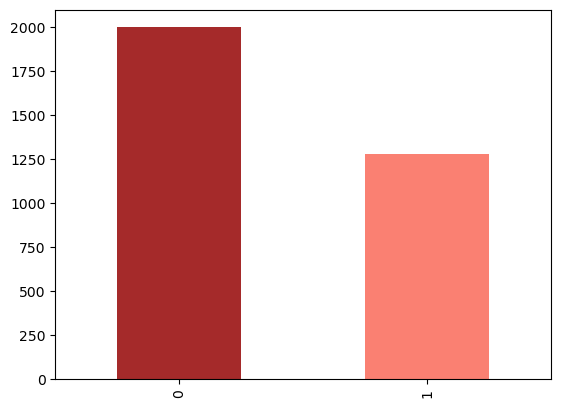

In [6]:
df.Potability.value_counts().plot(kind="bar", color=["brown", "salmon"])
plt.show()

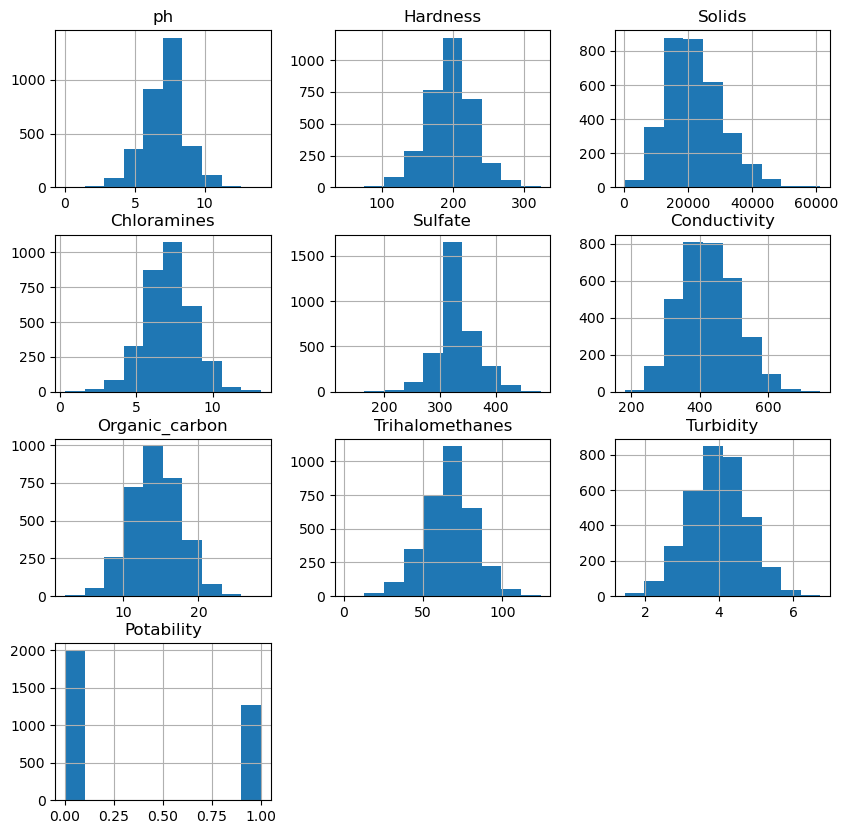

In [7]:
df.hist(figsize=(10,10))
plt.show()


In [8]:
def replaceOut(column):
    q1=column.quantile(0.25)
    q3=column.quantile(0.75)
    IQR=q3-q1
    lower=q1-1.5*(IQR)
    upper=q3+1.5*(IQR)
    outliers=column[(column<=lower) | (column>=upper)]
    if not outliers.empty:
        column[outliers.index] = column.mean()
    return column

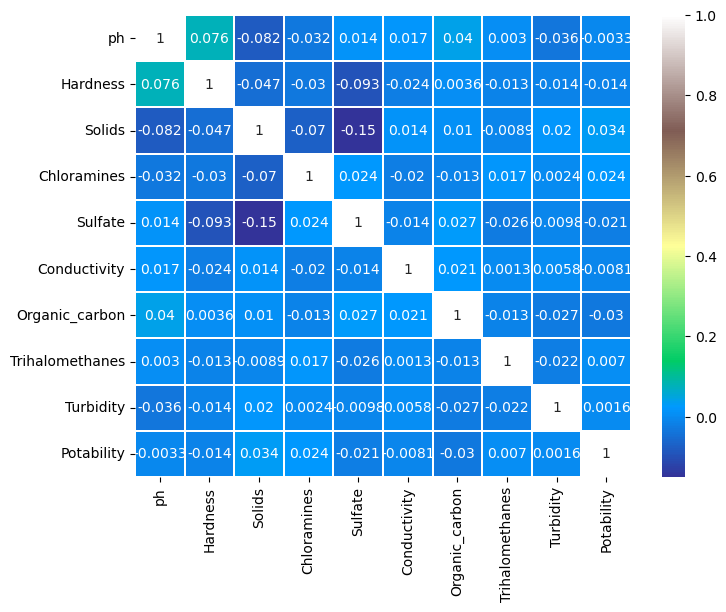

In [9]:
# create a correlation heatmap
sns.heatmap(df.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

In [10]:
df.size()

TypeError: 'numpy.int32' object is not callable

In [ ]:
df.boxplot(figsize=(14,7))


In [ ]:
df.describe()

# Normalization

# splitting data

In [11]:
X = df.drop('Potability',axis=1)

In [12]:
Y= df['Potability']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=101,shuffle=True)

In [14]:
Y_train.value_counts()

0    1596
1    1024
Name: Potability, dtype: int64

In [15]:
Y_test.value_counts()

0    402
1    254
Name: Potability, dtype: int64

In [16]:

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training data and transform both training and testing data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Normalization

In [17]:

from sklearn.preprocessing import MinMaxScaler,StandardScaler

normalizer=MinMaxScaler()
standardizer=StandardScaler()
X= normalizer.fit_transform(X)
X=standardizer.fit_transform(X)

# model building

# decision tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [19]:
dt_classifier = DecisionTreeClassifier(criterion='gini', min_samples_split=10, splitter='best', random_state=42)

In [20]:
dt_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=10, random_state=42)

In [21]:
Y_pred = dt_classifier.predict(X_test)

In [22]:
dt_accuracy = accuracy_score(Y_test, Y_pred)*100
dt_precision = precision_score(Y_test, Y_pred, average='binary')*100  # for binary classification
dt_recall = recall_score(Y_test, Y_pred, average='binary')*100  # for binary classification
dt_f1 = f1_score(Y_test, Y_pred, average='binary')*100  # for binary classification
dt_conf_matrix = confusion_matrix(Y_test, Y_pred)

In [23]:
print("Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1)
print("Confusion Matrix:")
print(dt_conf_matrix)

Accuracy: 59.14634146341463
Precision: 47.107438016528924
Recall: 44.881889763779526
F1 Score: 45.96774193548387
Confusion Matrix:
[[274 128]
 [140 114]]


# KNN

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(X_train, Y_train)

# Make predictions on the test set
knn_pred = knn_classifier.predict(X_test)

In [26]:
knn_accuracy = accuracy_score(Y_test, knn_pred)*100
knn_precision = precision_score(Y_test, knn_pred, average='binary')*100  # for binary classification
knn_recall = recall_score(Y_test, knn_pred, average='binary')*100  # for binary classification
knn_f1 = f1_score(Y_test, knn_pred, average='binary')*100  # for binary classification
knn_conf_matrix = confusion_matrix(Y_test, knn_pred)

In [27]:
print("Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("Confusion Matrix:")
print(knn_conf_matrix)

Accuracy: 57.012195121951216
Precision: 42.04545454545455
Recall: 29.133858267716533
F1 Score: 34.41860465116279
Confusion Matrix:
[[300 102]
 [180  74]]


# svm

In [28]:
from sklearn.svm import SVC

In [29]:
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)


In [30]:
print("hello")

hello


In [31]:
svm_classifier.fit(X_train, Y_train)

SVC(kernel='linear', random_state=42)

In [32]:
svm_pred = svm_classifier.predict(X_test)

In [33]:
svm_accuracy = accuracy_score(Y_test, svm_pred)*100
svm_precision = precision_score(Y_test, svm_pred, average='binary')*100  # for binary classification
svm_recall = recall_score(Y_test, svm_pred, average='binary')*100  # for binary classification
svm_f1 = f1_score(Y_test, svm_pred, average='binary')*100  # for binary classification
svm_conf_matrix = confusion_matrix(Y_test, svm_pred)

In [34]:
print("Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)
print("Confusion Matrix:")
print(svm_conf_matrix)

Accuracy: 61.28048780487805
Precision: 50.0
Recall: 0.39370078740157477
F1 Score: 0.78125
Confusion Matrix:
[[401   1]
 [253   1]]


# Random Forest


In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [37]:
rf_classifier.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [38]:
rf_pred = rf_classifier.predict(X_test)

In [39]:
rf_accuracy = accuracy_score(Y_test, rf_pred)*100
rf_precision = precision_score(Y_test, rf_pred, average='binary')*100  # for binary classification
rf_recall = recall_score(Y_test, rf_pred, average='binary')*100  # for binary classification
rf_f1 = f1_score(Y_test, rf_pred, average='binary')*100  # for binary classification
rf_conf_matrix = confusion_matrix(Y_test, rf_pred)

In [40]:
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)
print("Confusion Matrix:")
print(rf_conf_matrix)

Accuracy: 68.29268292682927
Precision: 66.42857142857143
Recall: 36.61417322834646
F1 Score: 47.20812182741116
Confusion Matrix:
[[355  47]
 [161  93]]


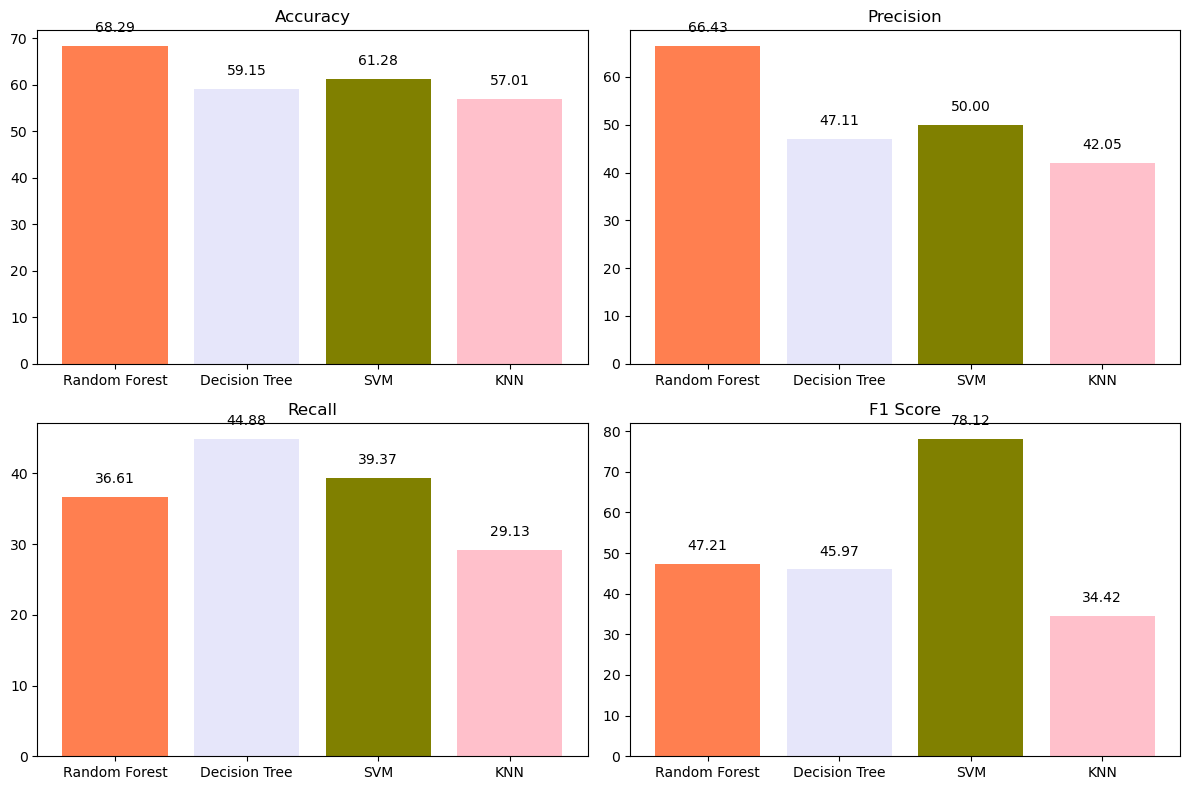

In [44]:
import matplotlib.pyplot as plt


# Sample data (replace this with your actual evaluation metric values)
accuracy_values = [68.29268292682927, 59.14634146341463,61.28048780487805 ,57.012195121951216]  # Replace with actual accuracy values for each algorithm
precision_values = [66.42857142857143, 47.107438016528924, 50.0, 42.04545454545455]  # Replace with actual precision values for each algorithm
recall_values = [36.61417322834646, 44.881889763779526,39.370078740157477, 29.133858267716533 ]  # Replace with actual recall values for each algorithm
f1_score_values = [47.20812182741116, 45.96774193548387,78.125, 34.41860465116279]  # Replace with actual F1-score values for each algorithm

# List of algorithms
algorithms = ['Random Forest', 'Decision Tree', 'SVM' , 'KNN']

# Create separate histograms for each evaluation metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

def annotate_bars(ax, values):
    for i, value in enumerate(values):
        ax.annotate(f'{value:.2f}', (i, value), textcoords="offset points", xytext=(0,10), ha='center')

# Histogram for Accuracy
axs[0, 0].bar(algorithms, accuracy_values, color=['coral', 'lavender', 'olive','pink'])
axs[0, 0].set_title('Accuracy')
annotate_bars(axs[0, 0], accuracy_values)

# Histogram for Precision
axs[0, 1].bar(algorithms, precision_values, color=['coral', 'lavender', 'olive','pink'])
axs[0, 1].set_title('Precision')
annotate_bars(axs[0, 1], precision_values)
# Histogram for Recall
axs[1, 0].bar(algorithms, recall_values, color=['coral', 'lavender', 'olive','pink'])
axs[1, 0].set_title('Recall')
annotate_bars(axs[1, 0], recall_values)
# Histogram for F1-score
axs[1, 1].bar(algorithms, f1_score_values, color=['coral', 'lavender', 'olive','pink'])
axs[1, 1].set_title('F1 Score')
annotate_bars(axs[1, 1], f1_score_values)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [45]:
dataset2=pd.read_csv('dataset2.csv')

In [46]:
dataset2.head()

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,1,7.25,23.1,4.5,7.8,342
1,2,7.11,22.3,5.1,6.2,335
2,3,7.03,21.5,3.9,8.3,356
3,4,7.38,22.9,3.2,9.5,327
4,5,7.45,20.7,3.8,8.1,352


In [47]:
df2=dataset2.drop('Sample ID',axis=1)
df2.describe()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,7.161140,22.054400,4.169400,8.382200,344.362000
std,0.107531,0.903123,0.397492,0.822396,13.038672
min,6.830000,20.300000,3.100000,6.000000,316.000000
25%,7.080000,21.200000,3.800000,7.800000,333.000000
50%,7.160000,22.200000,4.200000,8.400000,344.000000
75%,7.250000,22.900000,4.500000,9.100000,355.000000
max,7.480000,23.600000,5.100000,9.900000,370.000000


In [48]:
df2.fillna(dataset2.mean(), inplace=True)
df2.head()

,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm)
0,7.25,23.1,4.5,7.8,342
1,7.11,22.3,5.1,6.2,335
2,7.03,21.5,3.9,8.3,356
3,7.38,22.9,3.2,9.5,327
4,7.45,20.7,3.8,8.1,352


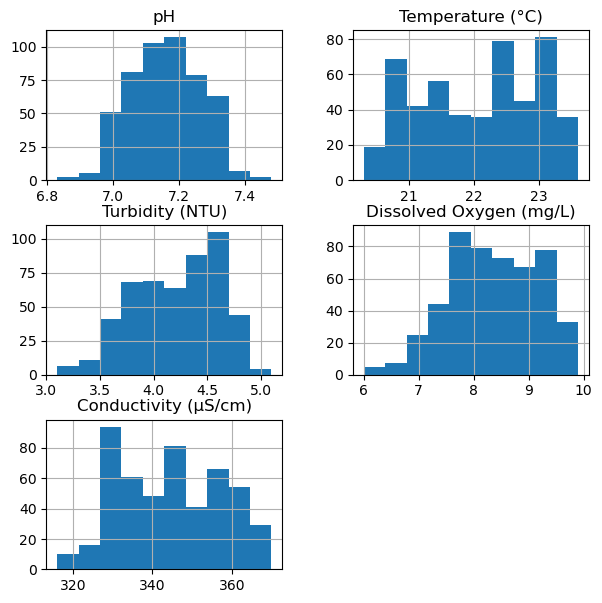

In [49]:
df2=dataset2.drop('Sample ID',axis=1)

df2.hist(figsize=(7,7))
plt.show()


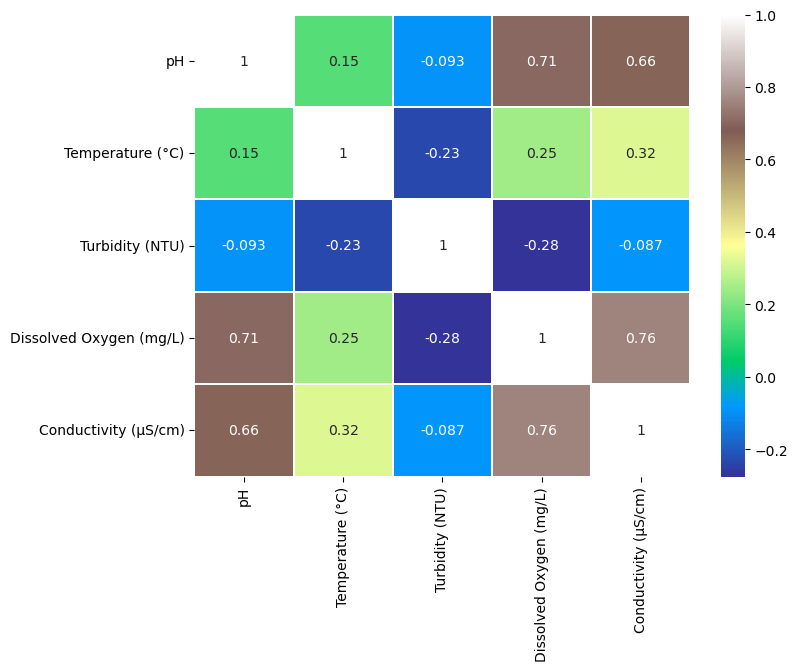

In [50]:
# create a correlation heatmap
sns.heatmap(df2.corr(),annot=True, cmap='terrain', linewidths=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

<Axes: >

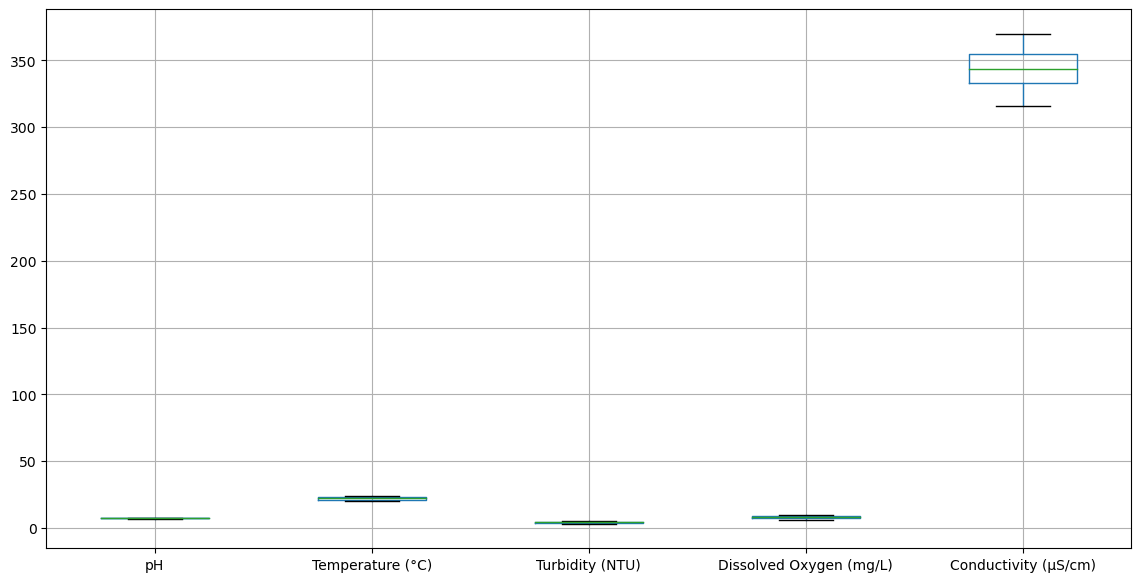

In [175]:
df2.boxplot(figsize=(14,7))

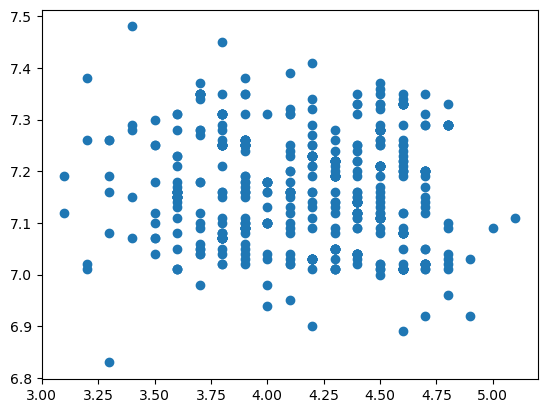

In [51]:
import matplotlib.pyplot as plt
plt.scatter(df2['Turbidity (NTU)'], df2['pH'])

C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

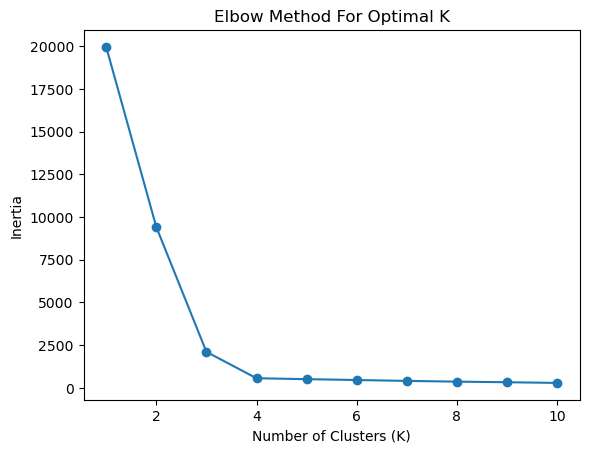

In [55]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import os
from sklearn.cluster import KMeans

# Set the environment variable to avoid the memory leak warning
os.environ['OMP_NUM_THREADS'] = '2'

# Explicitly set n_init to suppress the FutureWarning
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(X)

# Generate synthetic data for illustration purposes
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Range of K values to test
k_values = range(1, 11)

# Inertia values for different K values
inertia_values = []

# Calculate inertia for each K
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow curve
plt.plot(k_values, inertia_values, marker='o')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()


In [75]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Load your DataFrame from a CSV file
# Replace 'your_file.csv' with the actual file path
df2= pd.read_csv('dataset2.csv')

# Number of clusters (prototypes)
R = 3

# Assuming your features are in columns 'pH', 'Temperature (°C)', 'Turbidity (NTU)',
# 'Dissolved Oxygen (mg/L)', and 'Conductivity (µS/cm)'
X = df2[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)']].values

# Apply K-means clustering
kmeans = KMeans(n_clusters=R, random_state=42)
kmeans.fit(X)

# Function to classify a new data point
def classify_new_data_point(new_data_point):
    # Calculate distances to prototypes
    distances_to_prototypes = pairwise_distances_argmin_min([new_data_point], kmeans.cluster_centers_)[1]
    return np.argmin(distances_to_prototypes)

# Apply the function to the DataFrame and create a new column
df2['PredictedCluster'] = df2.apply(lambda row: classify_new_data_point(row[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)']].values), axis=1)

# Save the DataFrame with the new column back to a CSV file
df2.to_csv('output_file.csv', index=False)

# Example usage:
new_data_point = np.array([7.0, 25.0, 4.0, 7.0, 300])  # Replace with your actual new data point
predicted_cluster = classify_new_data_point(new_data_point)

print(f"The predicted cluster for the new data point is: {predicted_cluster}")


C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


The predicted cluster for the new data point is: 0


In [77]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

# Load your DataFrame from a CSV file
# Replace 'your_file.csv' with the actual file path
df3 = pd.read_csv('output_file.csv')

# Assuming your features are in columns 'pH', 'Temperature (°C)', 'Turbidity (NTU)',
# 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)', and 'PredictedCluster'
X = df3[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)', 'PredictedCluster']].values

# Define a threshold to determine 'potable' or 'non-potable'
threshold = 1  # Adjust this threshold based on your specific case

# Function to assign 'potable' or 'non-potable' based on the threshold
def assign_potability(cluster):
    return 'non-potable' if cluster < threshold else 'potable'

# Apply the function to create a new 'Potable' column
df['Potable'] = df3['PredictedCluster'].apply(assign_potability)

# Save the DataFrame with the new 'Potable' column back to a CSV file
df.to_csv('output_file_with_potable.csv', index=False)


In [78]:
df3

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),PredictedCluster
0,1,7.25,23.1,4.5,7.8,342,0
1,2,7.11,22.3,5.1,6.2,335,0
2,3,7.03,21.5,3.9,8.3,356,0
3,4,7.38,22.9,3.2,9.5,327,0
4,5,7.45,20.7,3.8,8.1,352,0
...,...,...,...,...,...,...,...
495,496,7.01,20.8,4.6,7.1,327,0
496,497,7.31,22.5,3.8,9.4,361,0
497,498,7.02,21.2,4.7,7.5,334,0
498,499,7.25,23.0,3.9,8.7,359,0


In [73]:
import pandas as pd

# Load your DataFrame from the CSV file with the 'Potable' column
# Replace 'output_file_with_potable.csv' with the actual file path
df = pd.read_csv('output_file_with_potable.csv')

# Filter rows with predicted cluster value of 1
predicted_cluster_1 = df[df['PredictedCluster'] == 1]

# Display the filtered DataFrame
print(predicted_cluster_1)


Empty DataFrame
Columns: [Sample ID, pH, Temperature (°C), Turbidity (NTU), Dissolved Oxygen (mg/L), Conductivity (µS/cm), PredictedCluster, Potable]
Index: []


In [74]:
import pandas as pd

# Load your DataFrame from the CSV file with the 'Potable' column
# Replace 'output_file_with_potable.csv' with the actual file path
df = pd.read_csv('output_file_with_potable.csv')

# Filter rows with predicted cluster value of 1
predicted_cluster_1 = df[df['PredictedCluster'] == 0]

# Display the filtered DataFrame
print(predicted_cluster_1)


     Sample ID    pH  Temperature (°C)  Turbidity (NTU)  \
0            1  7.25              23.1              4.5   
1            2  7.11              22.3              5.1   
2            3  7.03              21.5              3.9   
3            4  7.38              22.9              3.2   
4            5  7.45              20.7              3.8   
..         ...   ...               ...              ...   
495        496  7.01              20.8              4.6   
496        497  7.31              22.5              3.8   
497        498  7.02              21.2              4.7   
498        499  7.25              23.0              3.9   
499        500  7.12              20.9              4.4   

     Dissolved Oxygen (mg/L)  Conductivity (µS/cm)  PredictedCluster  \
0                        7.8                   342                 0   
1                        6.2                   335                 0   
2                        8.3                   356                 0   
3  

C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\91701\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


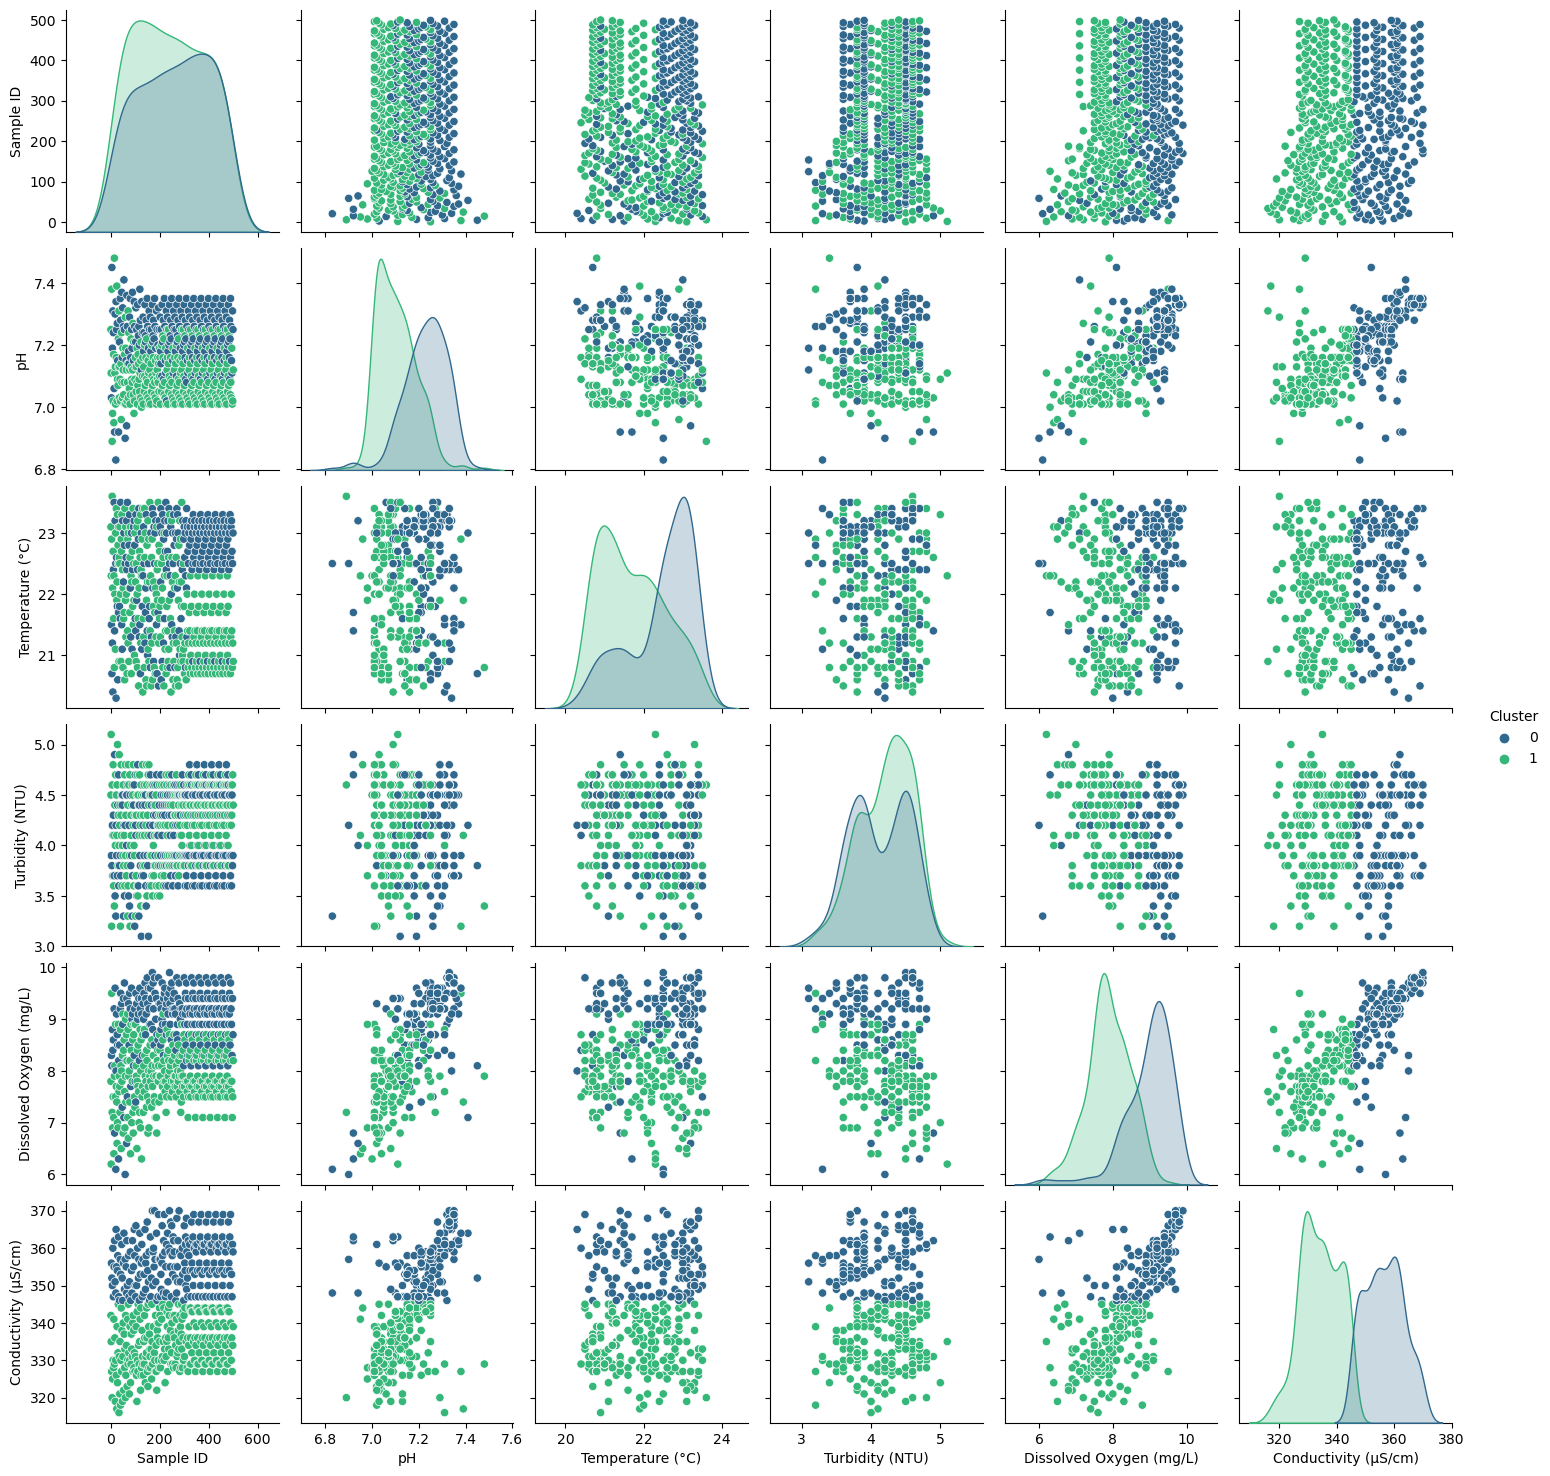

In [92]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrame from the CSV file
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('dataset2.csv')

# Assuming your features are in columns 'pH', 'Temperature (°C)', 'Turbidity (NTU)',
# 'Dissolved Oxygen (mg/L)', and 'Conductivity (µS/cm)'
X = df[['pH', 'Temperature (°C)', 'Turbidity (NTU)', 'Dissolved Oxygen (mg/L)', 'Conductivity (µS/cm)']].values

# Apply K-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters (pairplot for all features)
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.show()


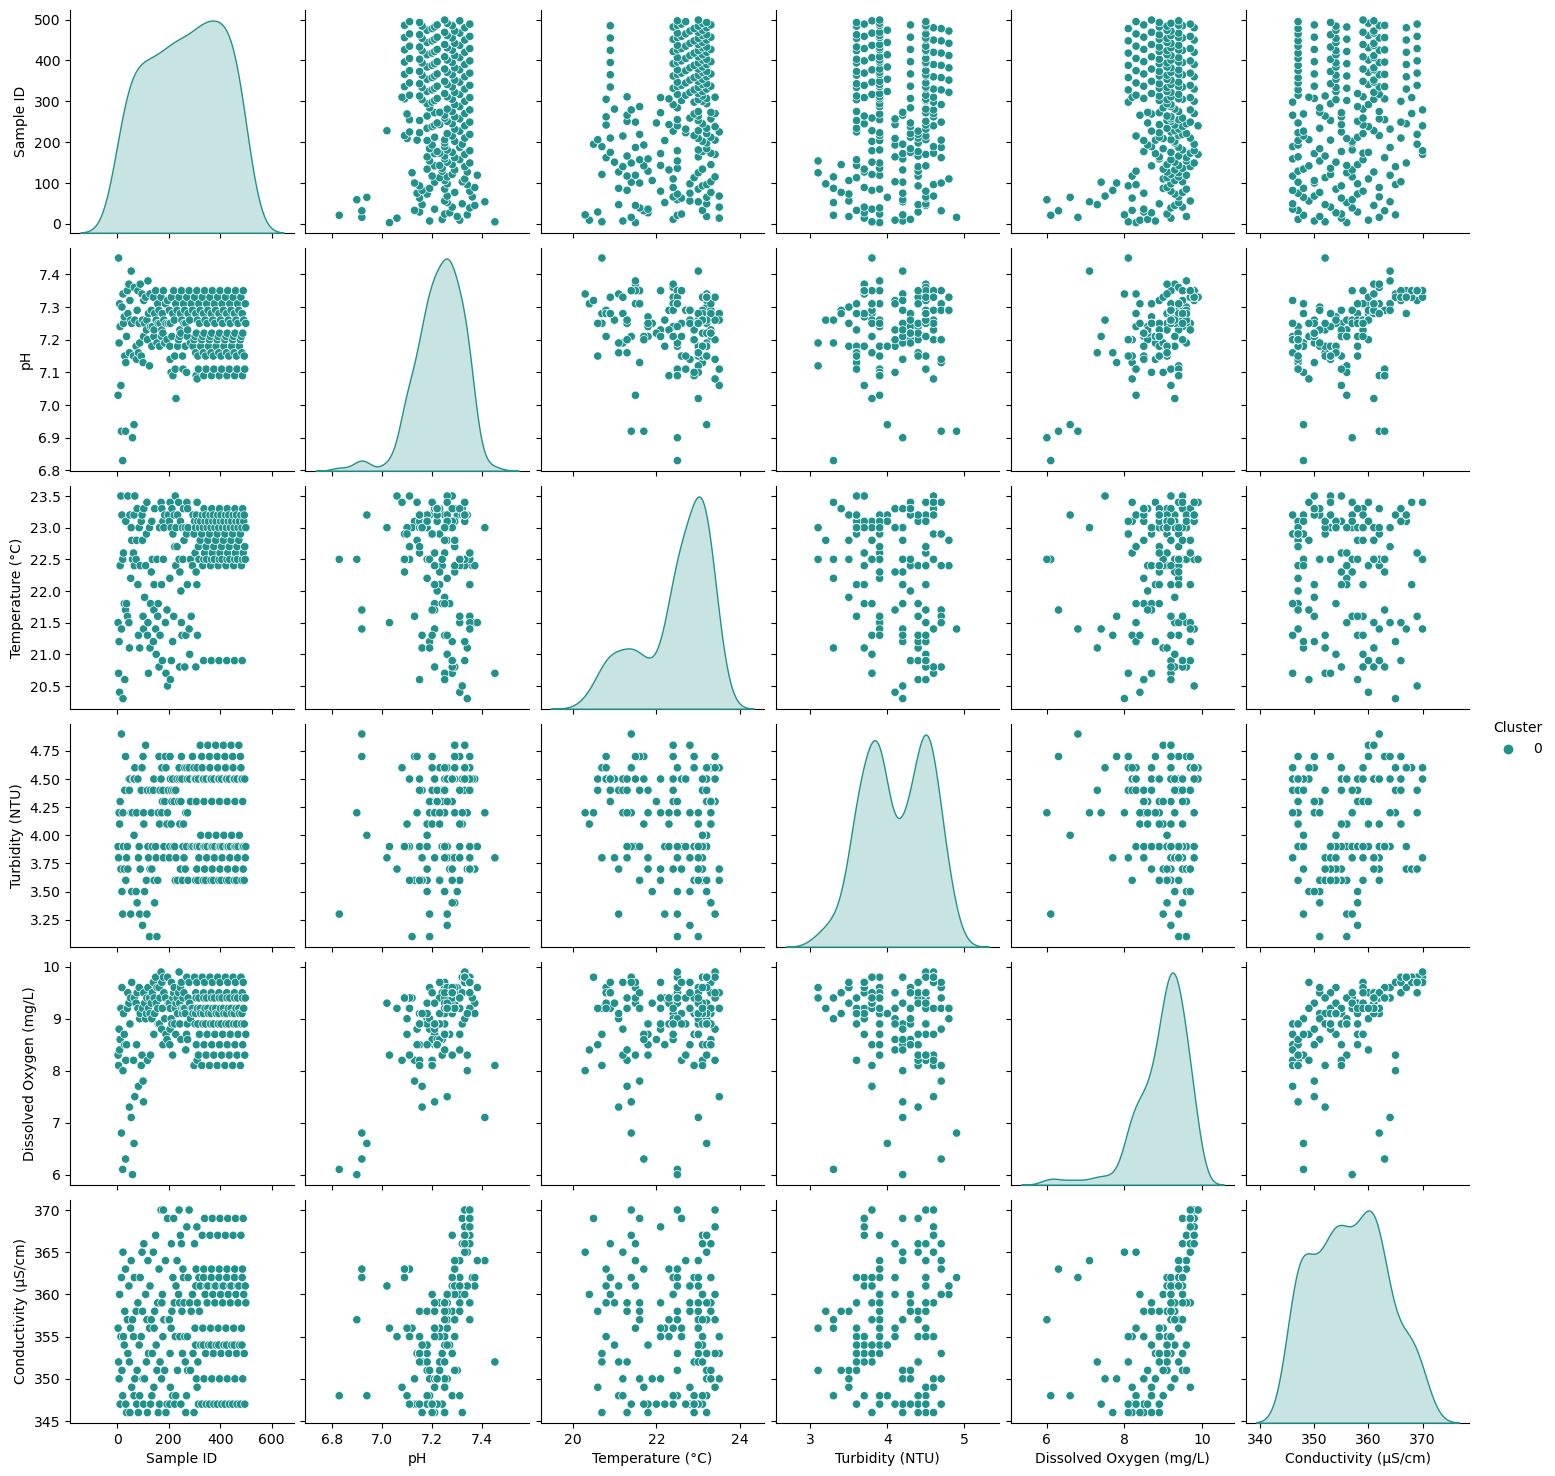

In [93]:
# Assuming 'Cluster' is the column created by KMeans
# Remove outliers based on the 'Cluster' column
df_no_outliers = df[df['Cluster'] == 0]  # You can choose Cluster 1 as well

# Visualize the data without outliers
sns.pairplot(df_no_outliers, hue='Cluster', palette='viridis')
plt.show()


In [82]:
# Print the new DataFrame with 6 columns
print(df_no_outliers)


     Sample ID    pH  Temperature (°C)  Turbidity (NTU)  \
2            3  7.03              21.5              3.9   
4            5  7.45              20.7              3.8   
6            7  7.19              21.2              4.2   
8            9  7.31              20.4              4.1   
10          11  7.24              22.4              4.3   
..         ...   ...               ...              ...   
490        491  7.26              23.1              3.9   
492        493  7.15              23.2              3.6   
494        495  7.11              22.7              4.5   
496        497  7.31              22.5              3.8   
498        499  7.25              23.0              3.9   

     Dissolved Oxygen (mg/L)  Conductivity (µS/cm)  Cluster  
2                        8.3                   356        0  
4                        8.1                   352        0  
6                        8.8                   350        0  
8                        8.4               

In [94]:
# Assuming 'Cluster' is the column created by KMeans
# Filter rows with 'Cluster' value equal to 1
cluster_1_rows = df[df['Cluster'] == 1]

# Display the filtered DataFrame
print(cluster_1_rows)


     Sample ID    pH  Temperature (°C)  Turbidity (NTU)  \
0            1  7.25              23.1              4.5   
1            2  7.11              22.3              5.1   
3            4  7.38              22.9              3.2   
5            6  6.89              23.6              4.6   
7            8  6.98              22.1              3.7   
..         ...   ...               ...              ...   
491        492  7.03              22.0              4.2   
493        494  7.19              21.4              4.3   
495        496  7.01              20.8              4.6   
497        498  7.02              21.2              4.7   
499        500  7.12              20.9              4.4   

     Dissolved Oxygen (mg/L)  Conductivity (µS/cm)  Cluster  
0                        7.8                   342        1  
1                        6.2                   335        1  
3                        9.5                   327        1  
5                        7.2               

In [98]:
df
df.to_csv('output_file_with_potable.csv', index=False)

In [130]:
df

,Sample ID,pH,Temperature (°C),Turbidity (NTU),Dissolved Oxygen (mg/L),Conductivity (µS/cm),Cluster
0,1,7.25,23.1,4.5,7.8,342,1
1,2,7.11,22.3,5.1,6.2,335,1
2,3,7.03,21.5,3.9,8.3,356,0
3,4,7.38,22.9,3.2,9.5,327,1
4,5,7.45,20.7,3.8,8.1,352,0
...,...,...,...,...,...,...,...
495,496,7.01,20.8,4.6,7.1,327,1
496,497,7.31,22.5,3.8,9.4,361,0
497,498,7.02,21.2,4.7,7.5,334,1
498,499,7.25,23.0,3.9,8.7,359,0


In [102]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load your DataFrame from the CSV file
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('output_file_with_potable.csv')

# Assuming your target variable is 'Potable' and features are the other columns
X = df.drop('Cluster', axis=1)  # Features
y = df['Cluster']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
dt2_pred = model.predict(X_test)

# Evaluate the model
dt2_accuracy = accuracy_score(y_test, dt2_pred)*100
dt2_precision = precision_score(y_test, dt2_pred, average='binary')*100  # for binary classification
dt2_recall = recall_score(y_test, dt2_pred, average='binary')*100  # for binary classification
dt2_f1 = f1_score(y_test, dt2_pred, average='binary')*100  # for binary classification
dt2_conf_matrix = confusion_matrix(y_test, dt2_pred)



In [103]:
print("Accuracy:", dt2_accuracy)
print("Precision:", dt2_precision)
print("Recall:", dt2_recall)
print("F1 Score:", dt2_f1)
print("Confusion Matrix:")
print(dt2_conf_matrix)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0
Confusion Matrix:
[[45  0]
 [ 0 55]]


# KNN ON Dataset2

In [107]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Train the KNN model
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
knn2_pred = knn_classifier.predict(X_test)

In [108]:
knn2_accuracy = accuracy_score(y_test, knn2_pred)*100
knn2_precision = precision_score(y_test, knn2_pred, average='binary')*100  # for binary classification
knn2_recall = recall_score(y_test, knn2_pred, average='binary')*100  # for binary classification
knn2_f1 = f1_score(y_test, knn2_pred, average='binary')*100  # for binary classification
knn2_conf_matrix = confusion_matrix(y_test, knn2_pred)

In [109]:
print("Accuracy:", knn2_accuracy)
print("Precision:", knn2_precision)
print("Recall:", knn2_recall)
print("F1 Score:", knn2_f1)
print("Confusion Matrix:")
print(knn2_conf_matrix)

Accuracy: 90.0
Precision: 90.9090909090909
Recall: 90.9090909090909
F1 Score: 90.9090909090909
Confusion Matrix:
[[40  5]
 [ 5 50]]


# SVM

In [110]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', C=1.0, random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [113]:
svm2_pred = svm_classifier.predict(X_test)

In [114]:
svm2_accuracy = accuracy_score(y_test, svm2_pred)*100
svm2_precision = precision_score(y_test, svm2_pred, average='binary')*100  # for binary classification
svm2_recall = recall_score(y_test, svm2_pred, average='binary')*100  # for binary classification
svm2_f1 = f1_score(y_test, svm2_pred, average='binary')*100  # for binary classification
svm2_conf_matrix = confusion_matrix(y_test, svm2_pred)

In [115]:
print("Accuracy:", svm2_accuracy)
print("Precision:", svm2_precision)
print("Recall:", svm2_recall)
print("F1 Score:", svm2_f1)
print("Confusion Matrix:")
print(svm2_conf_matrix)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0
Confusion Matrix:
[[45  0]
 [ 0 55]]


# Random Forest

In [116]:
from sklearn.ensemble import RandomForestClassifier

In [117]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [119]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [123]:
rf2_pred = rf_classifier.predict(X_test)

In [124]:
rf2_accuracy = accuracy_score(y_test, rf2_pred)*100
rf2_precision = precision_score(y_test, rf2_pred, average='binary')*100  # for binary classification
rf2_recall = recall_score(y_test, rf2_pred, average='binary')*100  # for binary classification
rf2_f1 = f1_score(y_test, rf2_pred, average='binary')*100  # for binary classification
rf2_conf_matrix = confusion_matrix(y_test, rf2_pred)

In [125]:
print("Accuracy:", rf2_accuracy)
print("Precision:", rf2_precision)
print("Recall:", rf2_recall)
print("F1 Score:", rf2_f1)
print("Confusion Matrix:")
print(rf2_conf_matrix)

Accuracy: 100.0
Precision: 100.0
Recall: 100.0
F1 Score: 100.0
Confusion Matrix:
[[45  0]
 [ 0 55]]


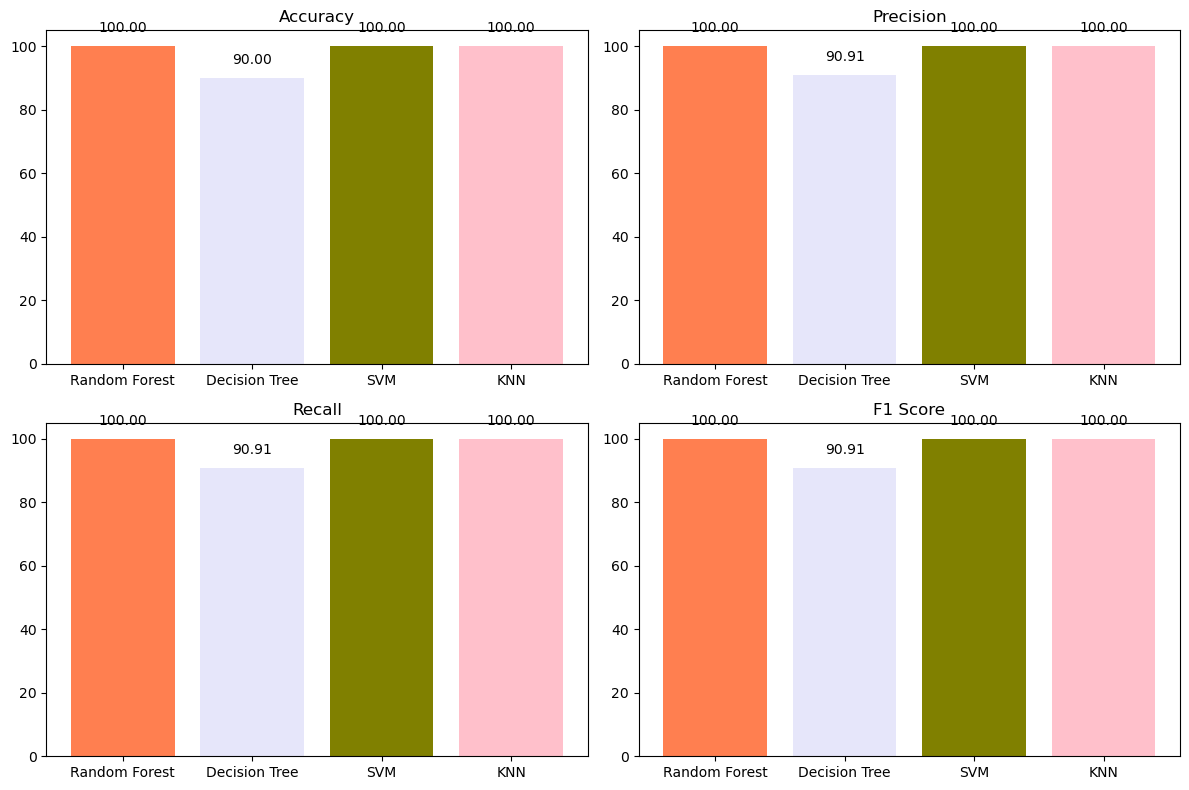

In [129]:
import matplotlib.pyplot as plt


# Sample data (replace this with your actual evaluation metric values)
accuracy_values = [100,90,100,100]  # Replace with actual accuracy values for each algorithm
precision_values = [100,90.909,100.,100]  # Replace with actual precision values for each algorithm
recall_values = [100,90.909,100,100 ]  # Replace with actual recall values for each algorithm
f1_score_values = [100,90.909,100,100]  # Replace with actual F1-score values for each algorithm

# List of algorithms
algorithms = ['Random Forest', 'Decision Tree', 'SVM' , 'KNN']

# Create separate histograms for each evaluation metric
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

def annotate_bars(ax, values):
    for i, value in enumerate(values):
        ax.annotate(f'{value:.2f}', (i, value), textcoords="offset points", xytext=(0,10), ha='center')

# Histogram for Accuracy
axs[0, 0].bar(algorithms, accuracy_values, color=['coral', 'lavender', 'olive','pink'])
axs[0, 0].set_title('Accuracy')
annotate_bars(axs[0, 0], accuracy_values)

# Histogram for Precision
axs[0, 1].bar(algorithms, precision_values, color=['coral', 'lavender', 'olive','pink'])
axs[0, 1].set_title('Precision')
annotate_bars(axs[0, 1], precision_values)
# Histogram for Recall
axs[1, 0].bar(algorithms, recall_values, color=['coral', 'lavender', 'olive','pink'])
axs[1, 0].set_title('Recall')
annotate_bars(axs[1, 0], recall_values)
# Histogram for F1-score
axs[1, 1].bar(algorithms, f1_score_values, color=['coral', 'lavender', 'olive','pink'])
axs[1, 1].set_title('F1 Score')
annotate_bars(axs[1, 1], f1_score_values)
# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
